# Credit Card Fraud Detection Classification

# Brief Description of Dataset

Information about dataset, paysim1:

URL of Kaggle Dataset page: https://www.kaggle.com/ntnu-testimon/paysim1

The dataset was made for performing research on fraud detection methods.

Here are the variables in the datasets as well as their descriptions:

step - integer - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).

type - string/categorical - type of transaction: CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

amount - float - amount of the transaction in local currency.

nameOrig - string - customer who initiated the transaction

oldbalanceOrg - float initial balance before the transaction

newbalanceOrig - float - new balance after the transaction

nameDest - string - customer who is the recipient of the transaction

oldbalanceDest - float - initial balance of recipient before the transaction.

newbalanceDest - float - new balance of recipient after the transaction.

isFraud - boolean/binary - determines if transaction is fraudulent (encoded as 1) or valid (encoded as 0)

isFlaggedFraud - boolean/binary - determines if transaction is flagged as fraudulent (encoded as 1) or not flagged at all (encoded as 0). An observation is flagged if the transaction is fraudulent and it involved a transfer of over 200,000 in the local currency.



In [245]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [246]:
dataframe= pd.read_csv("PS_20174392719_1491204439457_log.csv")

In [247]:
dataframe.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [248]:
dataframe.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


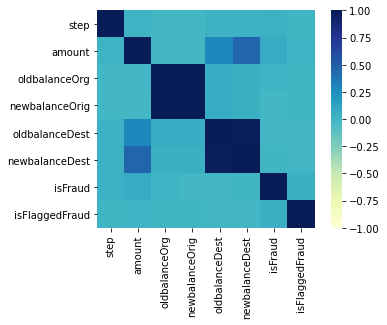

In [249]:
%matplotlib inline
corr=dataframe.corr()
ax=sns.heatmap(corr, vmin=-1, vmax=1, center=0,
               square=True, cmap='YlGnBu')

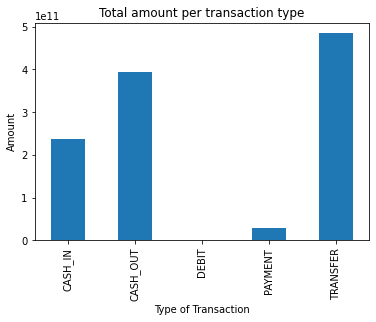

In [250]:
var = dataframe.groupby('type').amount.sum()
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
var.plot(kind='bar')
ax1.set_title("Total amount per transaction type")
ax1.set_xlabel('Type of Transaction')
ax1.set_ylabel('Amount');

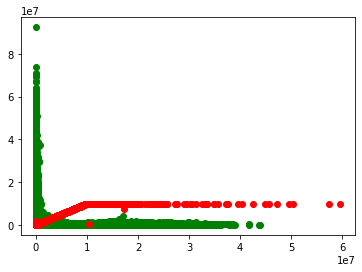

In [251]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(nonfraud['oldbalanceOrg'],nonfraud['amount'],c='g')
ax.scatter(fraud['oldbalanceOrg'],fraud['amount'],c='r')
plt.show()

In [252]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


# Key TakeAway

There are no missing values
There are just over 6 million observations
There are 11 variables
Most transactions involve amounts less than 1 million euros.
Most observations in the dataset are of valid transactions, so any patterns related to identifying fraud transactions may be hard to see, data is also unbalanced.


In [253]:
del dataframe['nameDest']
del dataframe['nameOrig']
del dataframe['isFlaggedFraud']

In [254]:
dataframe1=dataframe[0:-1]
dataframe1.head(2)

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0


In [255]:
cnt0=(dataframe['isFraud']==0).sum()
cnt1=(dataframe['isFraud']==1).sum()

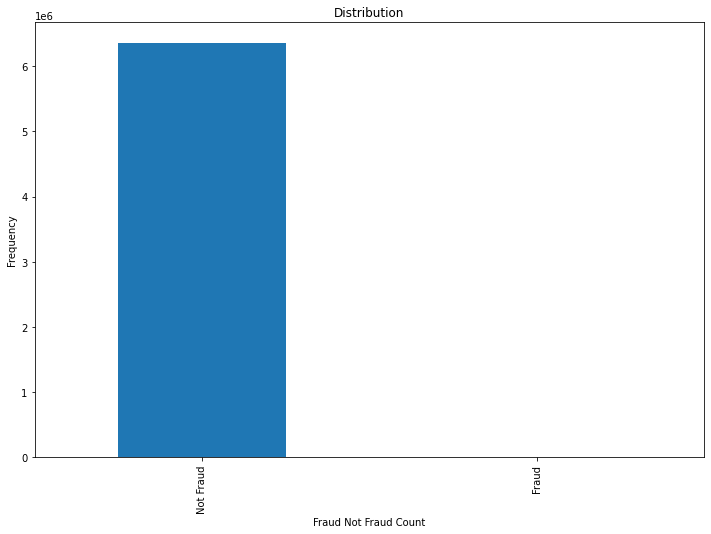

In [256]:
somelist=[cnt0,cnt1]
freq_series = pd.Series(somelist)
plt.figure(figsize=(12, 8))
ax =freq_series.plot(kind='bar')
name=['Not Fraud', 'Fraud']
ax.set_title('Distribution')
ax.set_xlabel('Fraud Not Fraud Count')
ax.set_ylabel('Frequency')
ax.set_xticklabels(name)
plt.show()

In [257]:
le=preprocessing.LabelEncoder()
dataframe1['type2']=le.fit_transform(dataframe1['type'])
del dataframe1['type']
shuffled_df=dataframe1.sample(frac=1,random_state=4)
fraud_df=shuffled_df.loc[shuffled_df['isFraud']==1]
non_fraud_df=shuffled_df.loc[shuffled_df['isFraud']==0].sample(8212,random_state=4)
normalized=pd.concat([fraud_df,non_fraud_df])

<ipython-input-257-a0b6e3b879b0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe1['type2']=le.fit_transform(dataframe1['type'])


In [258]:
cnt2=(normalized['isFraud']==0).sum()
cnt3=(normalized['isFraud']==1).sum()

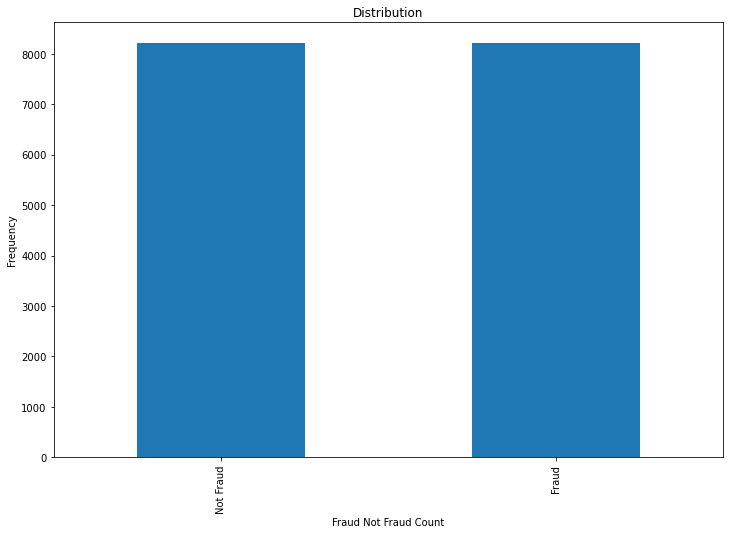

In [259]:
somelist1=[cnt2,cnt3]
freq_series1 = pd.Series(somelist1)
plt.figure(figsize=(12, 8))
ax = freq_series1.plot(kind='bar')
name=['Not Fraud', 'Fraud']
ax.set_title('Distribution')
ax.set_xlabel('Fraud Not Fraud Count')
ax.set_ylabel('Frequency')
ax.set_xticklabels(name)
plt.show()

# ANN

An artificial neural network (ANN) is the component of artificial intelligence that is meant to simulate the functioning of a human brain. Processing units make up ANNs, which in turn consist of inputs and outputs. The inputs are what the ANN learns from to produce the desired output.
Artificial neural networks (ANN) are used for modelling non-linear problems and to predict the output values for given input parameters from their training values.

In [260]:
normalized1=normalized.sample(frac=1, random_state=4)
X=normalized1.drop(['isFraud'], axis=1)
Y=normalized1['isFraud']
y3=Y.values.reshape(-1,1)
st_sc = StandardScaler()
X = st_sc.fit_transform(X)
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder()
Y1=ohe.fit_transform(y3).toarray()
from sklearn.model_selection  import train_test_split
x_train, x_test, y_train,y_test=train_test_split(X,Y1, test_size=0.2, random_state=1)

In [261]:
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.models import load_model
model = Sequential()
model.add(Dense(units = 64, input_dim = 7, activation = "relu"))
model.add(Dense(units = 32, activation = "relu"))
model.add(Dense(units = 64, activation = "relu"))
model.add(Dense(units = 128, activation = "relu"))
model.add(Dropout(0.3))
model.add(Dense(units = 2, activation = "sigmoid"))
model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 64)                512       
_________________________________________________________________
dense_11 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_12 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_13 (Dense)             (None, 128)               8320      
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 2)                 258       
Total params: 13,282
Trainable params: 13,282
Non-trainable params: 0
__________________________________________________

In [262]:
model.fit(x_train, y_train, batch_size = 128, epochs = 10, verbose=1)

Epoch 1/10
103/103 [==============================] - 0s 739us/step - loss: 0.4533 - accuracy: 0.8160
Epoch 2/10
103/103 [==============================] - 0s 713us/step - loss: 0.2336 - accuracy: 0.9034
Epoch 3/10
103/103 [==============================] - 0s 731us/step - loss: 0.1845 - accuracy: 0.9240
Epoch 4/10
103/103 [==============================] - 0s 727us/step - loss: 0.1646 - accuracy: 0.9303
Epoch 5/10
103/103 [==============================] - 0s 740us/step - loss: 0.1452 - accuracy: 0.9403
Epoch 6/10
103/103 [==============================] - 0s 746us/step - loss: 0.1349 - accuracy: 0.9447
Epoch 7/10
103/103 [==============================] - 0s 727us/step - loss: 0.1214 - accuracy: 0.9524
Epoch 8/10
103/103 [==============================] - 0s 756us/step - loss: 0.1147 - accuracy: 0.9562
Epoch 9/10
103/103 [==============================] - 0s 721us/step - loss: 0.1104 - accuracy: 0.9533
Epoch 10/10
103/103 [==============================] - 0s 733us/step - loss: 0.108

In [263]:
score = model.evaluate(x_test, y_test)
print(score[1])

103/103 [==============================] - 0s 370us/step - loss: 0.0999 - accuracy: 0.9629
0.9628614783287048


In [264]:
scoring=model.predict(x_test)
classes=model.predict_classes(x_test)
classes.reshape(1,-1)

array([[1, 0, 1, ..., 1, 1, 1]], dtype=int64)

In [265]:
somepredictions=model.predict(x_test)
accdl=metrics.accuracy_score(y_test.argmax(axis=1), somepredictions.argmax(axis=1))
accdl=accdl*100

In [266]:
CM_ANN = confusion_matrix(y_test.argmax(axis=1), somepredictions.argmax(axis=1))
print(pd.DataFrame(
   CM_ANN,
    columns=['Predicted Not fraud', 'Predicted fraud'],
    index=['True not fraud', 'True fraud']
))

                Predicted Not fraud  Predicted fraud
True not fraud                 1632               57
True fraud                       65             1531


In [267]:
ann01 = CM_ANN[0,1]
print("Number of valid transactions labelled as fraudulent by ANN: \n", CM_ANN[0,1])

Number of valid transactions labelled as fraudulent by ANN: 
 57


In [268]:
ann10 = CM_ANN[1,0]
print("Number of fraud transactions labelled as valid by ANN: \n", CM_ANN[1,0])

Number of fraud transactions labelled as valid by ANN: 
 65


# KNN

The k-nearest neighbors (KNN) algorithm is a simple, supervised machine learning algorithm that can be used to solve both classification and regression problems. The purpose is to use a database in which the data points are separated into several classes to predict the classification of a new sample point. But has a major drawback of becoming significantly slows as the size of that data in use grows.

In [269]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
k_range=range(1,26)
scores={}
scores_list=[]

for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred=knn.predict(x_test)
    scores[k]=metrics.accuracy_score(y_test, y_pred)
    scores_list.append(scores[k])

Text(0, 0.5, 'testing accuracy')

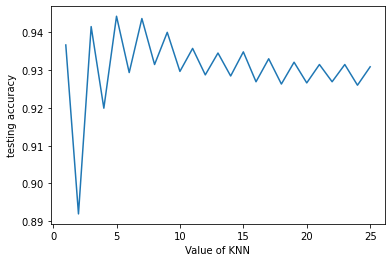

In [270]:
plt.plot(k_range, scores_list)
plt.xlabel("Value of KNN")
plt.ylabel("testing accuracy")

In [271]:
scores_list.index(max(scores_list))

4

In [272]:
knn1=KNeighborsClassifier(n_neighbors=4)
knn1.fit(x_train, y_train)
y_prediction2=knn1.predict(x_test)
accknn=metrics.accuracy_score(y_test, y_prediction2)
accknn=accknn*100

In [273]:
CM_KNN = confusion_matrix(y_test.argmax(axis=1), y_prediction2.argmax(axis=1))
print(pd.DataFrame(
    CM_KNN,
    columns=['Predicted Not fraud', 'Predicted fraud'],
    index=['True not fraud', 'True fraud']
))

                Predicted Not fraud  Predicted fraud
True not fraud                 1645               44
True fraud                      138             1458


In [274]:
from sklearn import metrics
print(metrics.accuracy_score(y_test,y_prediction2))

0.9199391171993911


In [275]:
print("Number of valid transactions labelled as fraudulent by KNN: \n", CM_KNN[0,1])

Number of valid transactions labelled as fraudulent by KNN: 
 44


In [276]:
print("Number of fraud transactions labelled as valid by KNN: \n", CM_KNN[1,0])

Number of fraud transactions labelled as valid by KNN: 
 138


# Decision Tree Classifier

A decision tree is a very specific type of probability tree that enables you to make a decision about some kind of process. Decision trees provide a way to present algorithms with conditional control statements. They include branches that represent decision-making steps that can lead to a favorable result.

In [277]:
from sklearn import tree
model = tree.DecisionTreeClassifier()
model.fit(x_train, y_train)
y_predict = model.predict(x_test)
from sklearn.metrics import accuracy_score
accdt=accuracy_score(y_test, y_predict)
accdt=accdt*100

In [278]:
CM_DT = confusion_matrix(y_test.argmax(axis=1), y_predict.argmax(axis=1))
print(pd.DataFrame(
    CM_DT,
    columns=['Predicted Not fraud', 'Predicted fraud'],
    index=['True not fraud', 'True fraud']
))

                Predicted Not fraud  Predicted fraud
True not fraud                 1671               18
True fraud                       12             1584


In [279]:
from sklearn import metrics
print(metrics.accuracy_score(y_test,y_predict))

0.9908675799086758


In [280]:
dt01 =  CM_DT[0,1]
print("Number of valid transactions labelled as fraudulent by Decision Tree Classifier: \n",dt01)

Number of valid transactions labelled as fraudulent by Decision Tree Classifier: 
 18


In [281]:
dt10 = CM_DT[1,0]
print("Number of fraud transactions labelled as valid by Decision Tree Classifier: \n", dt10)

Number of fraud transactions labelled as valid by Decision Tree Classifier: 
 12


# Logistic Regression

Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable, although many more complex extensions exist. Logistic regression analysis is used to examine the association of (categorical or continuous) independent variable(s) with one dichotomous dependent variable. This is in contrast to linear regression analysis in which the dependent variable is a continuous variable

In [282]:
dataframe.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0


In [283]:
meta_data = pd.read_csv("PS_20174392719_1491204439457_log.csv")
del meta_data['nameDest']
del meta_data['nameOrig']
del meta_data['type']
len(meta_data)

6362620

In [284]:
Cols = meta_data[['step','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','isFlaggedFraud']]
y = meta_data['isFraud']
X = Cols

In [285]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 

In [286]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import linear_model
logitic = linear_model.LogisticRegression()
model = logitic.fit(X_train,y_train)
predictions = model.predict(X_test)
CM_LR = confusion_matrix(y_test, predictions)
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test, predictions))


from sklearn.metrics import accuracy_score
acclg = accuracy_score(y_test,predictions)
acclg = acclg*100
accuracy_score(y_test,predictions)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.37      0.43      0.40      2435

    accuracy                           1.00   1908786
   macro avg       0.68      0.72      0.70   1908786
weighted avg       1.00      1.00      1.00   1908786

[[1904535    1816]
 [   1380    1055]]


0.9983256373422689

In [287]:
lr01 = CM_LR[0,1]
print("Number of valid transactions labelled as fraudulent by Logistic Regression: \n", lr01)

Number of valid transactions labelled as fraudulent by Logistic Regression: 
 1816


In [288]:
lr10 = CM_LR[1,0]
print("Number of fraud transactions labelled as valid by Logistic Regression: \n", CM_LR[1,0])

Number of fraud transactions labelled as valid by Logistic Regression: 
 1380


# NAIVE BAYES

Naive Bayes is a kind of classifier which uses the Bayes Theorem. It predicts membership probabilities for each class such as the probability that given record or data point belongs to a particular class. The class with the highest probability is considered as the most likely class.

In [289]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
model = gnb.fit(X_train,y_train)
predictions = model.predict(X_test)
CM_NB = confusion_matrix(y_test, predictions)
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test, predictions))
accnb = accuracy_score(y_test,predictions)
accnb = accnb*100
accuracy_score(y_test,predictions)

              precision    recall  f1-score   support

           0       1.00      0.99      1.00   1906351
           1       0.03      0.16      0.05      2435

    accuracy                           0.99   1908786
   macro avg       0.51      0.58      0.52   1908786
weighted avg       1.00      0.99      0.99   1908786

[[1893838   12513]
 [   2043     392]]


0.9923742106239254

In [290]:
nb01 = CM_NB[0,1]
print("Number of valid transactions labelled as fraudulent by Naive Bayes: \n",nb01) 

Number of valid transactions labelled as fraudulent by Naive Bayes: 
 12513


In [291]:
nb10 = CM_NB[1,0]
print("Number of fraud transactions labelled as valid by Naive Bayes: \n", CM_NB[1,0])

Number of fraud transactions labelled as valid by Naive Bayes: 
 2043


# Import Multi input Tensorflow

In [292]:
%store -r acctf

In [293]:
print(acctf)

99.72000122070312


In [294]:
%store -r tf01
%store -r tf10

# Import RandomForest and XGBoost

In [295]:
%store -r accuracyRF

In [296]:
accuracyRF =accuracyRF*100

In [297]:
print(accuracyRF)

99.99783425714298


In [298]:
%store -r accuracyXGB

In [299]:
accuracyXGB1 = accuracyXGB*100

In [300]:
print(accuracyXGB1)

99.99783425714298


In [301]:
%store -r rf01
%store -r rf10
%store -r xgb01
%store -r xgb10

# Comparision of Accuracy Score

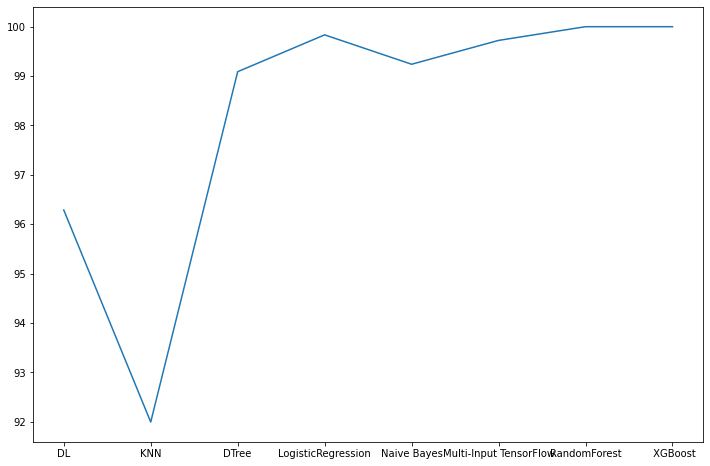

In [302]:
acc_list=[accdl,accknn,accdt,acclg,accnb,acctf,accuracyRF,accuracyXGB1]
ac_score1 = pd.Series(acc_list)
plt.figure(figsize=(12,8))

name=['DL', 'KNN', 'DTree' , 'LogisticRegression' , 'Naive Bayes' ,'Multi-Input TensorFlow' , 'RandomForest' , ' XGBoost']
plt.plot(name,ac_score1)
ax.set_title('Comparison')
ax.set_ylabel('score')
ax.set_xlabel('ANN vs KNN vs Decision Trees vs Logistic Regression vs Naive Bayes vs Multi-Input TensorFlow vs RandomForest vs  XGBoost')
plt.show()

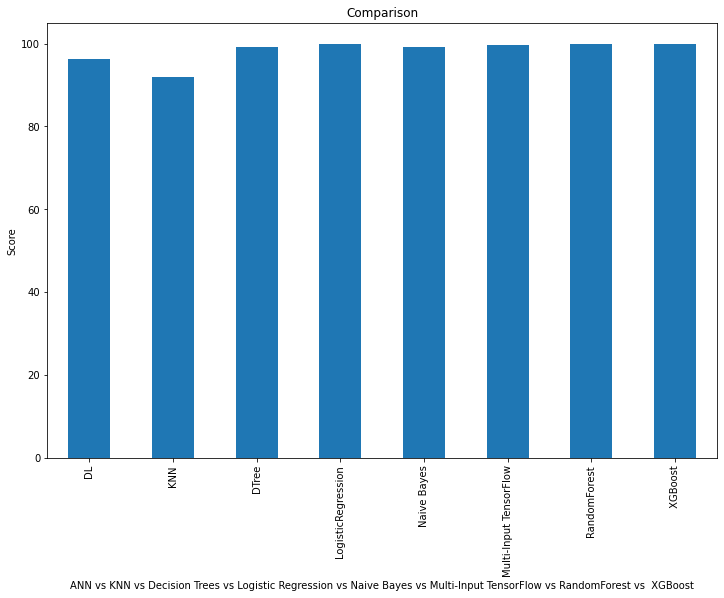

In [303]:
acc_list=[accdl,accknn,accdt,acclg,accnb,acctf,accuracyRF,accuracyXGB1]
ac_score1 = pd.Series(acc_list)
plt.figure(figsize=(12, 8))
ax = ac_score1.plot(kind='bar')
name=['DL', 'KNN', 'DTree' , 'LogisticRegression' , 'Naive Bayes' ,'Multi-Input TensorFlow' , 'RandomForest' , ' XGBoost']
ax.set_title('Comparison')
ax.set_xlabel('ANN vs KNN vs Decision Trees vs Logistic Regression vs Naive Bayes vs Multi-Input TensorFlow vs RandomForest vs  XGBoost')
ax.set_ylabel('Score')
ax.set_xticklabels(name)
plt.show()

# Comparision of Number of valid transactions labelled as fraudulent

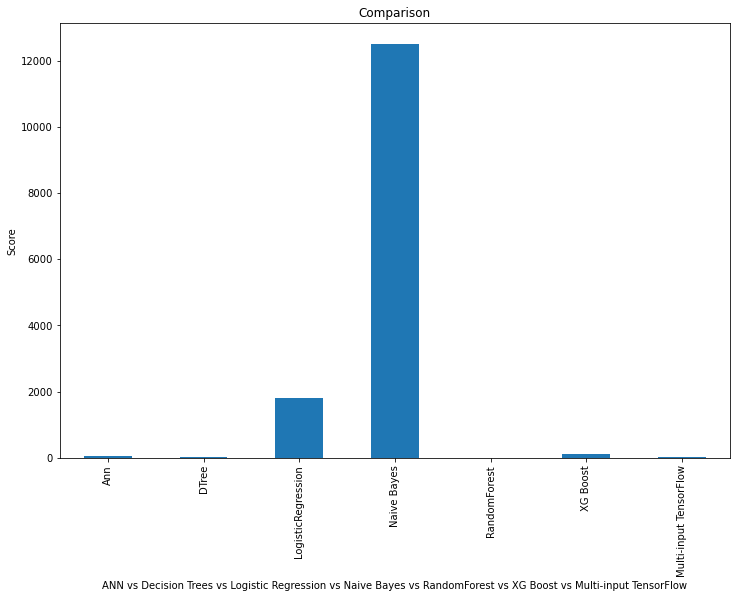

In [304]:
acc_list=[ann01,dt01,lr01,nb01,rf01,xgb01,tf01]
ac_score1 = pd.Series(acc_list)
plt.figure(figsize=(12, 8))
ax = ac_score1.plot(kind='bar')
name=[ 'Ann','DTree' , 'LogisticRegression' , 'Naive Bayes','RandomForest','XG Boost','Multi-input TensorFlow']
ax.set_title('Comparison')
ax.set_xlabel('ANN vs Decision Trees vs Logistic Regression vs Naive Bayes vs RandomForest vs XG Boost vs Multi-input TensorFlow')
ax.set_ylabel('Score')
ax.set_xticklabels(name)
plt.show()

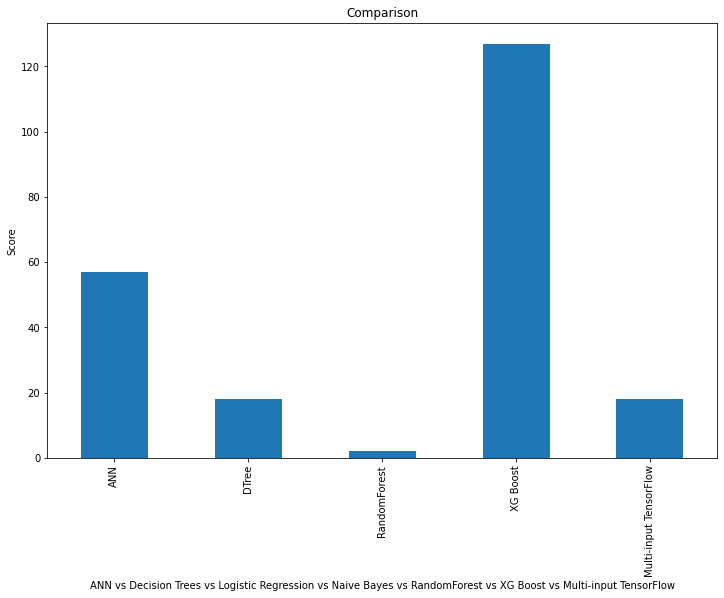

In [306]:
acc_list=[ann01,dt01,rf01,xgb01,tf01]
ac_score1 = pd.Series(acc_list)
plt.figure(figsize=(12, 8))
ax = ac_score1.plot(kind='bar')
name=[ 'ANN','DTree' ,'RandomForest','XG Boost','Multi-input TensorFlow']
ax.set_title('Comparison')
ax.set_xlabel('ANN vs Decision Trees vs Logistic Regression vs Naive Bayes vs RandomForest vs XG Boost vs Multi-input TensorFlow')
ax.set_ylabel('Score')
ax.set_xticklabels(name)
plt.show()

# Comparision of Number of Fraud transactions labelled as valid

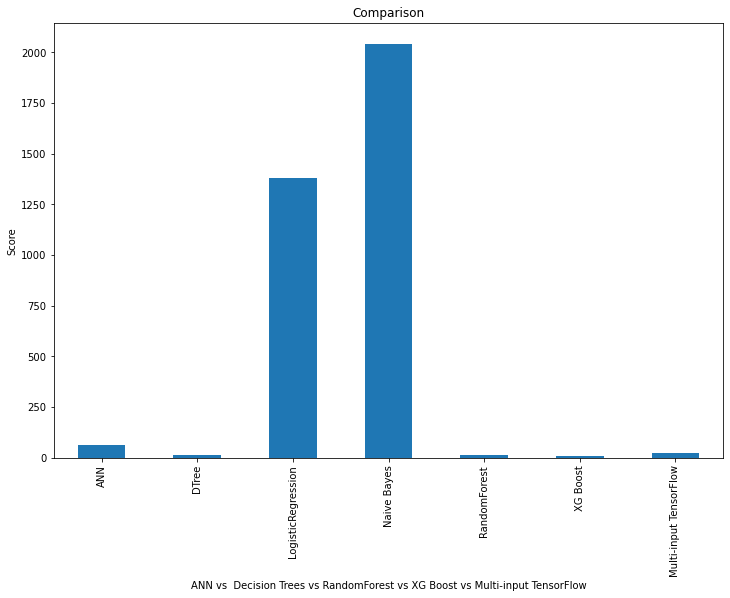

In [307]:
acc_list=[ann10,dt10,lr10,nb10,rf10,xgb10,tf10]
ac_score1 = pd.Series(acc_list)
plt.figure(figsize=(12, 8))
ax = ac_score1.plot(kind='bar')
name=['ANN', 'DTree' , 'LogisticRegression' , 'Naive Bayes','RandomForest','XG Boost', 'Multi-input TensorFlow']
ax.set_title('Comparison')
ax.set_xlabel('ANN vs  Decision Trees vs RandomForest vs XG Boost vs Multi-input TensorFlow')
ax.set_ylabel('Score')
ax.set_xticklabels(name)
plt.show()

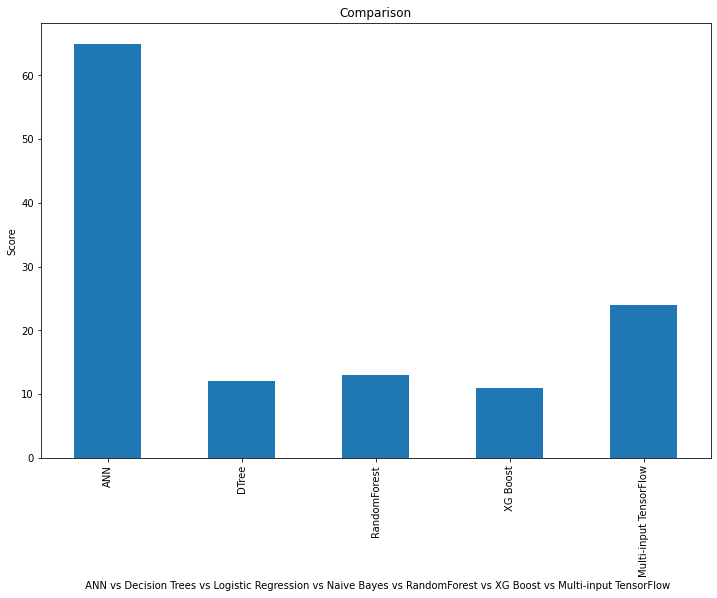

In [308]:
acc_list=[ann10,dt10,rf10,xgb10,tf10]
ac_score1 = pd.Series(acc_list)
plt.figure(figsize=(12, 8))
ax = ac_score1.plot(kind='bar')
name=[ 'ANN','DTree','RandomForest','XG Boost', 'Multi-input TensorFlow']
ax.set_title('Comparison')
ax.set_xlabel(' ANN vs Decision Trees vs Logistic Regression vs Naive Bayes vs RandomForest vs XG Boost vs Multi-input TensorFlow')
ax.set_ylabel('Score')
ax.set_xticklabels(name)
plt.show()

# Conclusion

Based purely on the results on the confusion matrix, the better model is decided by which model incurs the lowest costs.

If the combined cost of mislabelling over 100 more valid transactions as fraudulent exceeds the cost of mislabelling a few more
fraudulent transactions as valid,
Hence the random forest would be a better model.